# Figure X.x - Supervised model performance

Goals : 

- Show that 3D models outperform usual 2D models

In [34]:
from pathlib import Path
import numpy as np
from tifffile import imread
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from stardist.matching import matching_dataset
sys.path.append("../..")

from utils import *

import pyclesperanto_prototype as cle
from skimage.morphology import remove_small_objects

print("Used GPU: ", cle.get_device())

Plot parameters : 
- Colormap : mako
- DPI : 200
- Data path : C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK
- Font size : 15
- Title font size : 26
- Label font size : 18
Used GPU:  <Intel(R) UHD Graphics 620 on Platform: Intel(R) OpenCL (2 refs)>


In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [36]:
data_path = DATA_PATH / "RESULTS/SUPERVISED_PERF_FIG/INFERENCE"
image = imread(data_path / "visual.tif")
labels_gt = imread(data_path / "GT_visual.tif")

In [37]:
swin = imread(data_path / "Swin/Swin_latest_pred.tif")
segresnet = imread(data_path / "SegResNet/SegResNet_latest_pred.tif")
#####
cellpose = imread(data_path / "cellpose/visual_cp_masks.tif")

## Computations

In [38]:
swin_thresholded = np.where(swin > 0.5, swin, 0)
segresnet_thresholded = np.where(segresnet > 0.45, segresnet, 0)

In [39]:
swin_instance = cle.voronoi_otsu_labeling(swin_thresholded, spot_sigma=0.65, outline_sigma=0.65)
segresnet_instance = cle.voronoi_otsu_labeling(segresnet_thresholded, spot_sigma=0.65, outline_sigma=0.65)
swin_instance = np.array(swin_instance)
segresnet_instance = np.array(segresnet_instance)

In [40]:
# save_folder = data_path / "processed"
# save_folder.mkdir(exist_ok=True, parents=False)
# from tifffile import imwrite
# imwrite(save_folder / "swin_instance.tif", swin_instance)
# imwrite(save_folder / "segresnet_instance.tif", segresnet_instance)

## Plots

Validating on Swin
********************
Validating on SegResNet
********************
Validating on Cellpose
********************


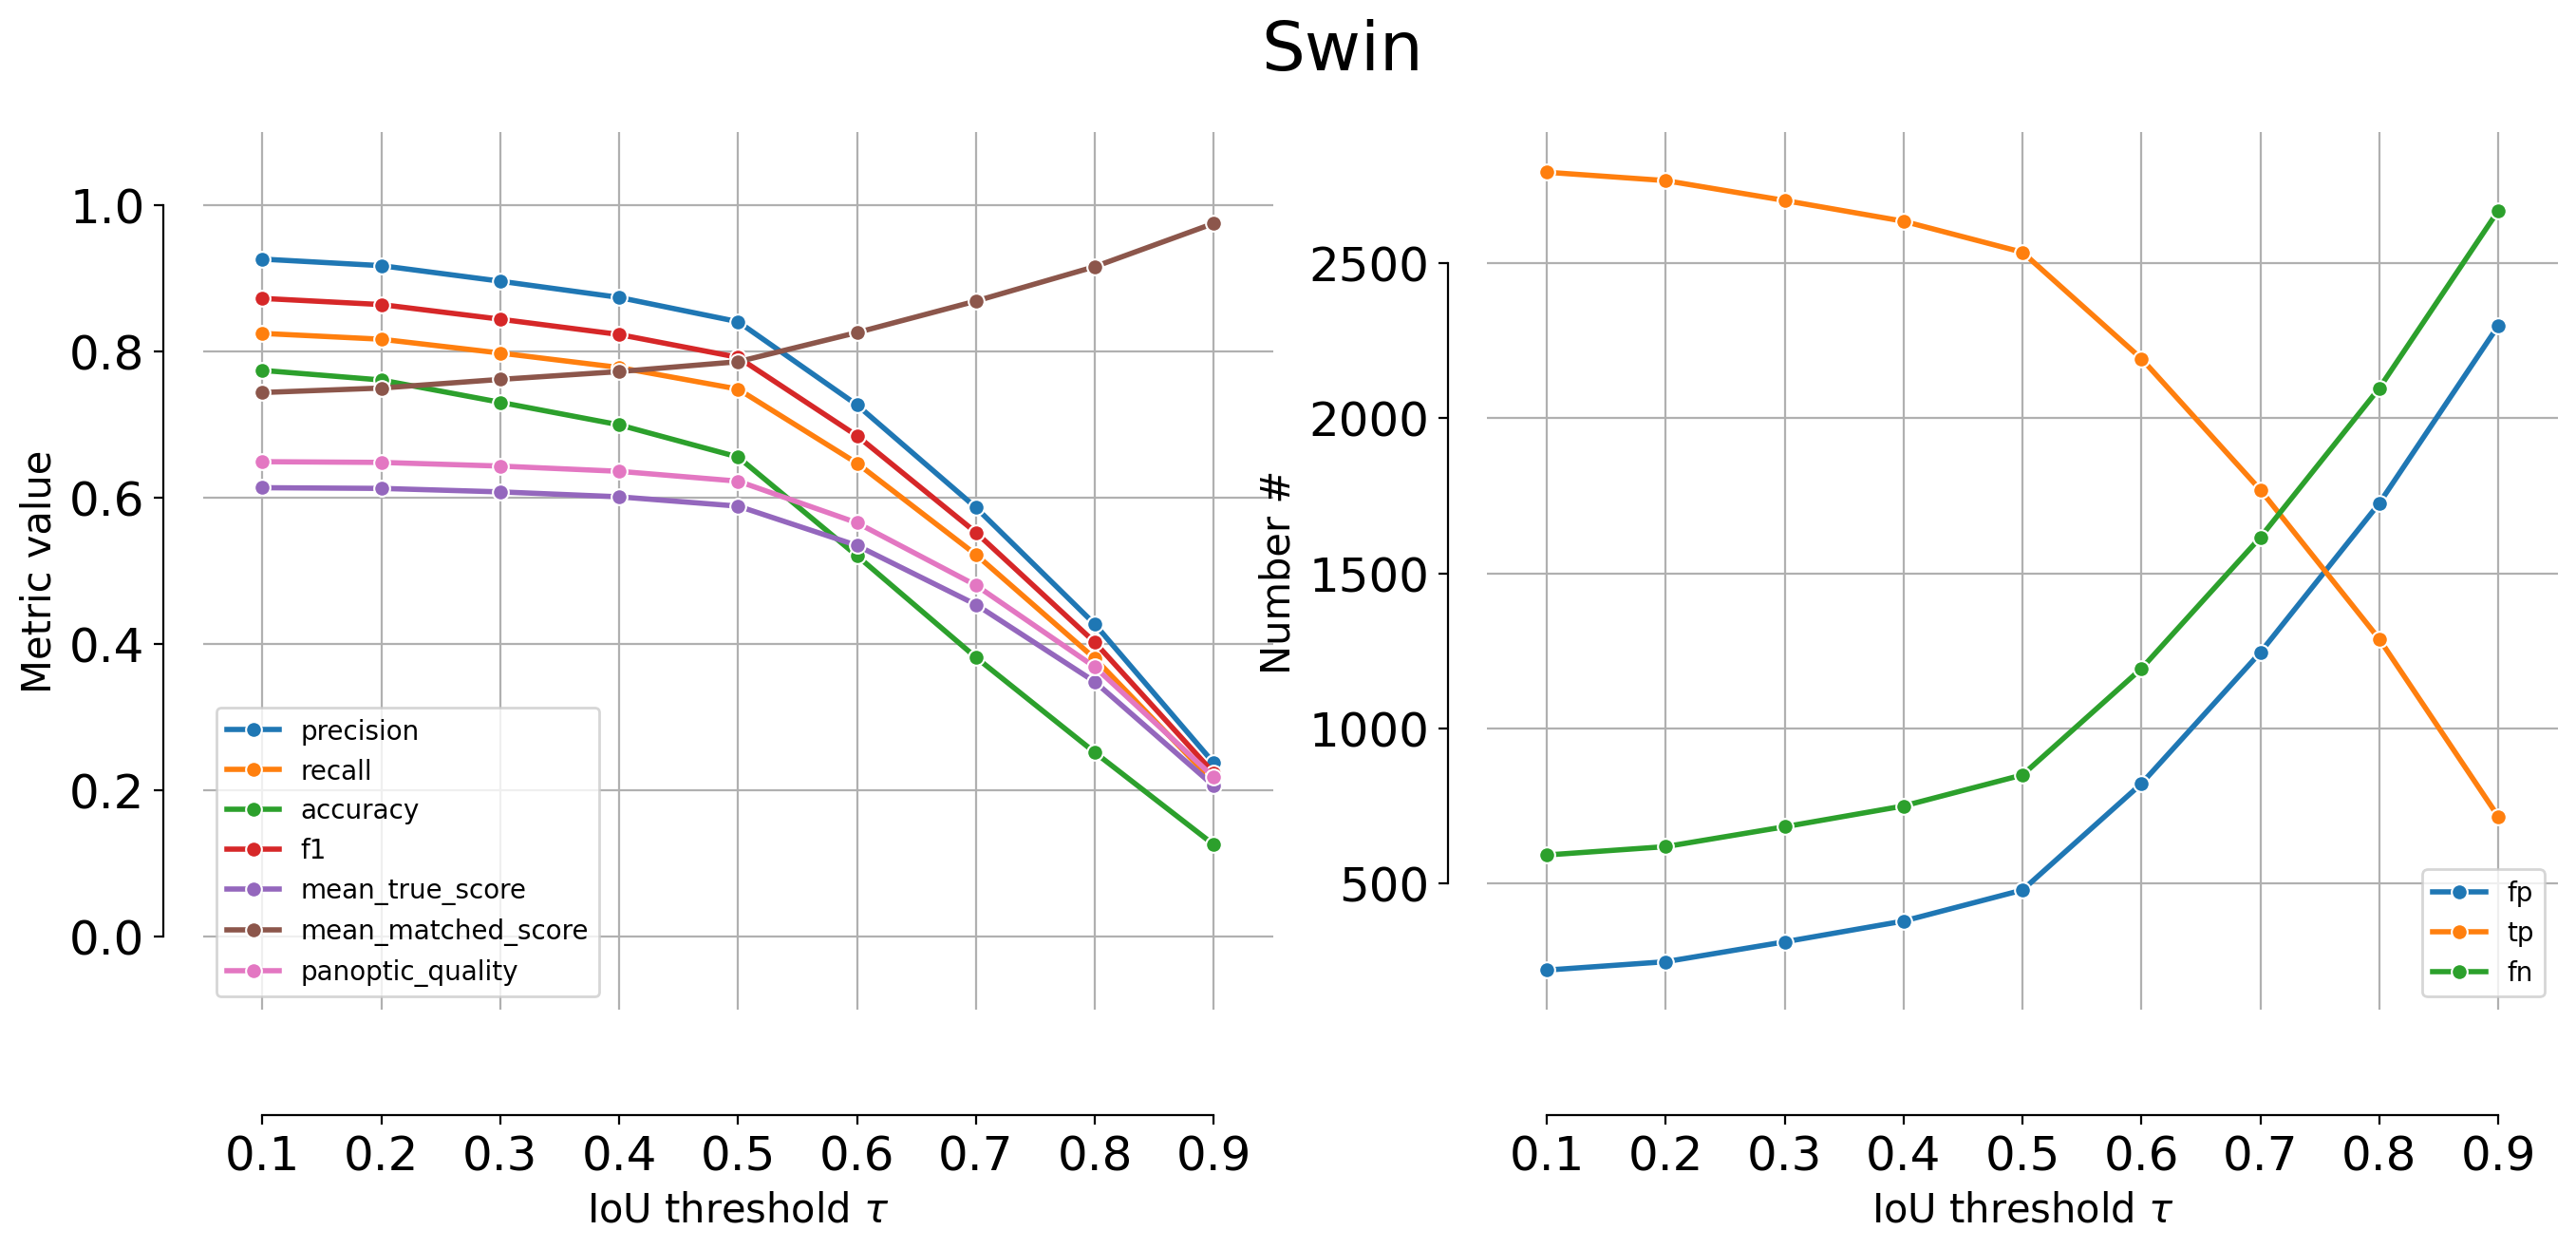

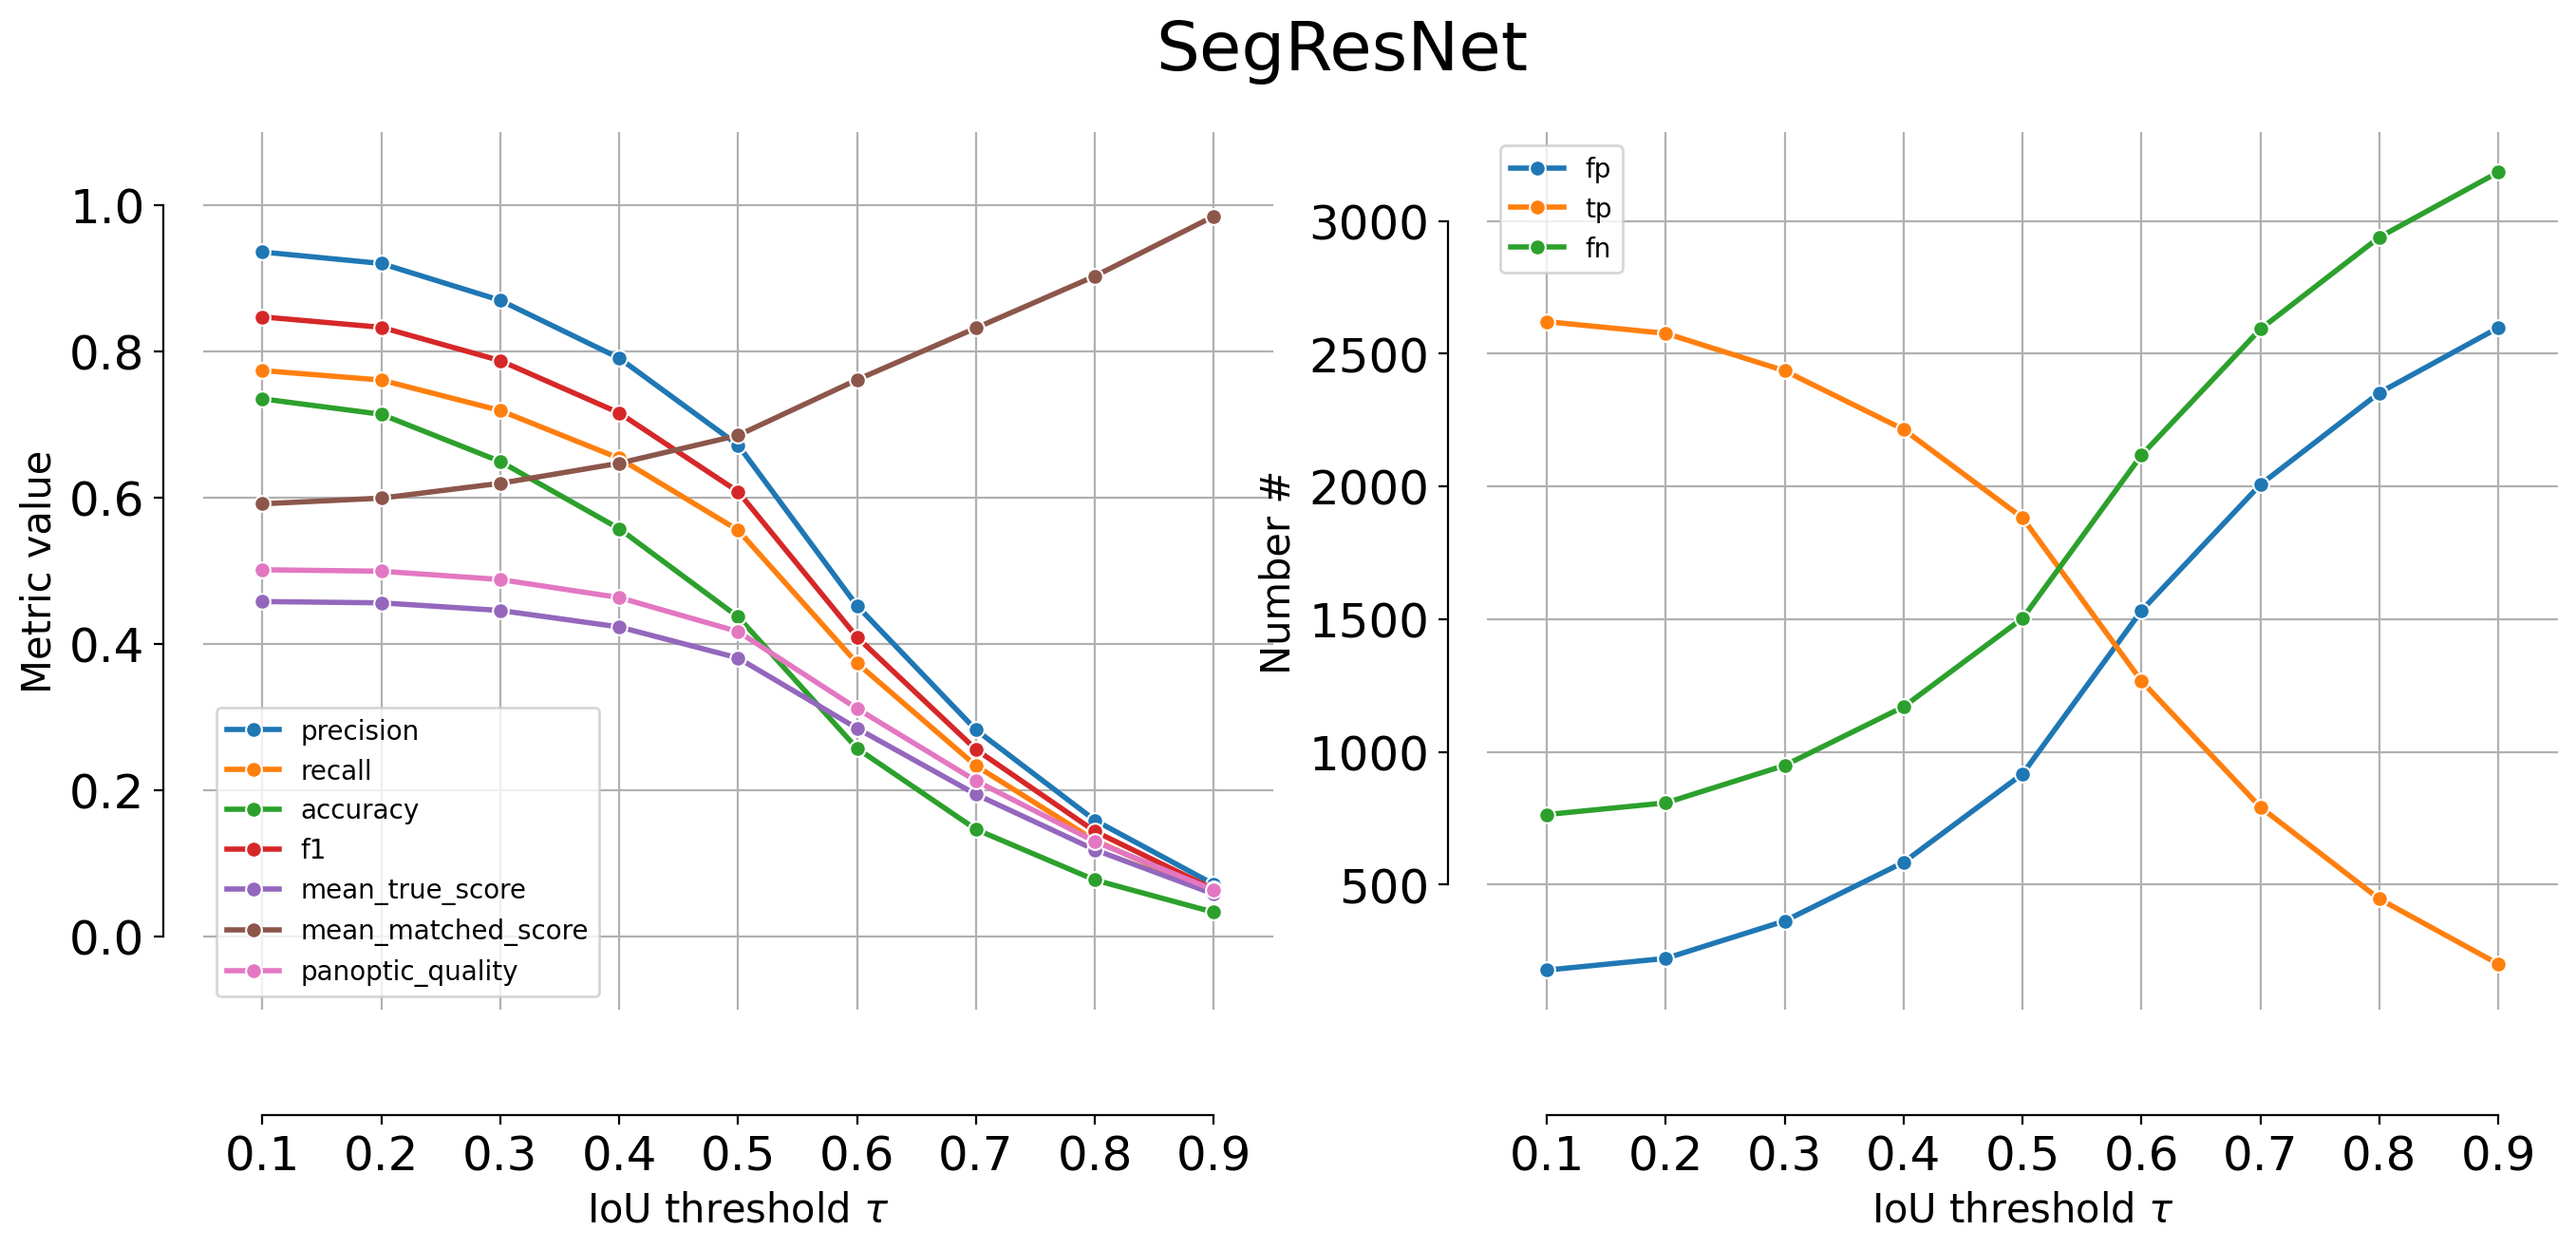

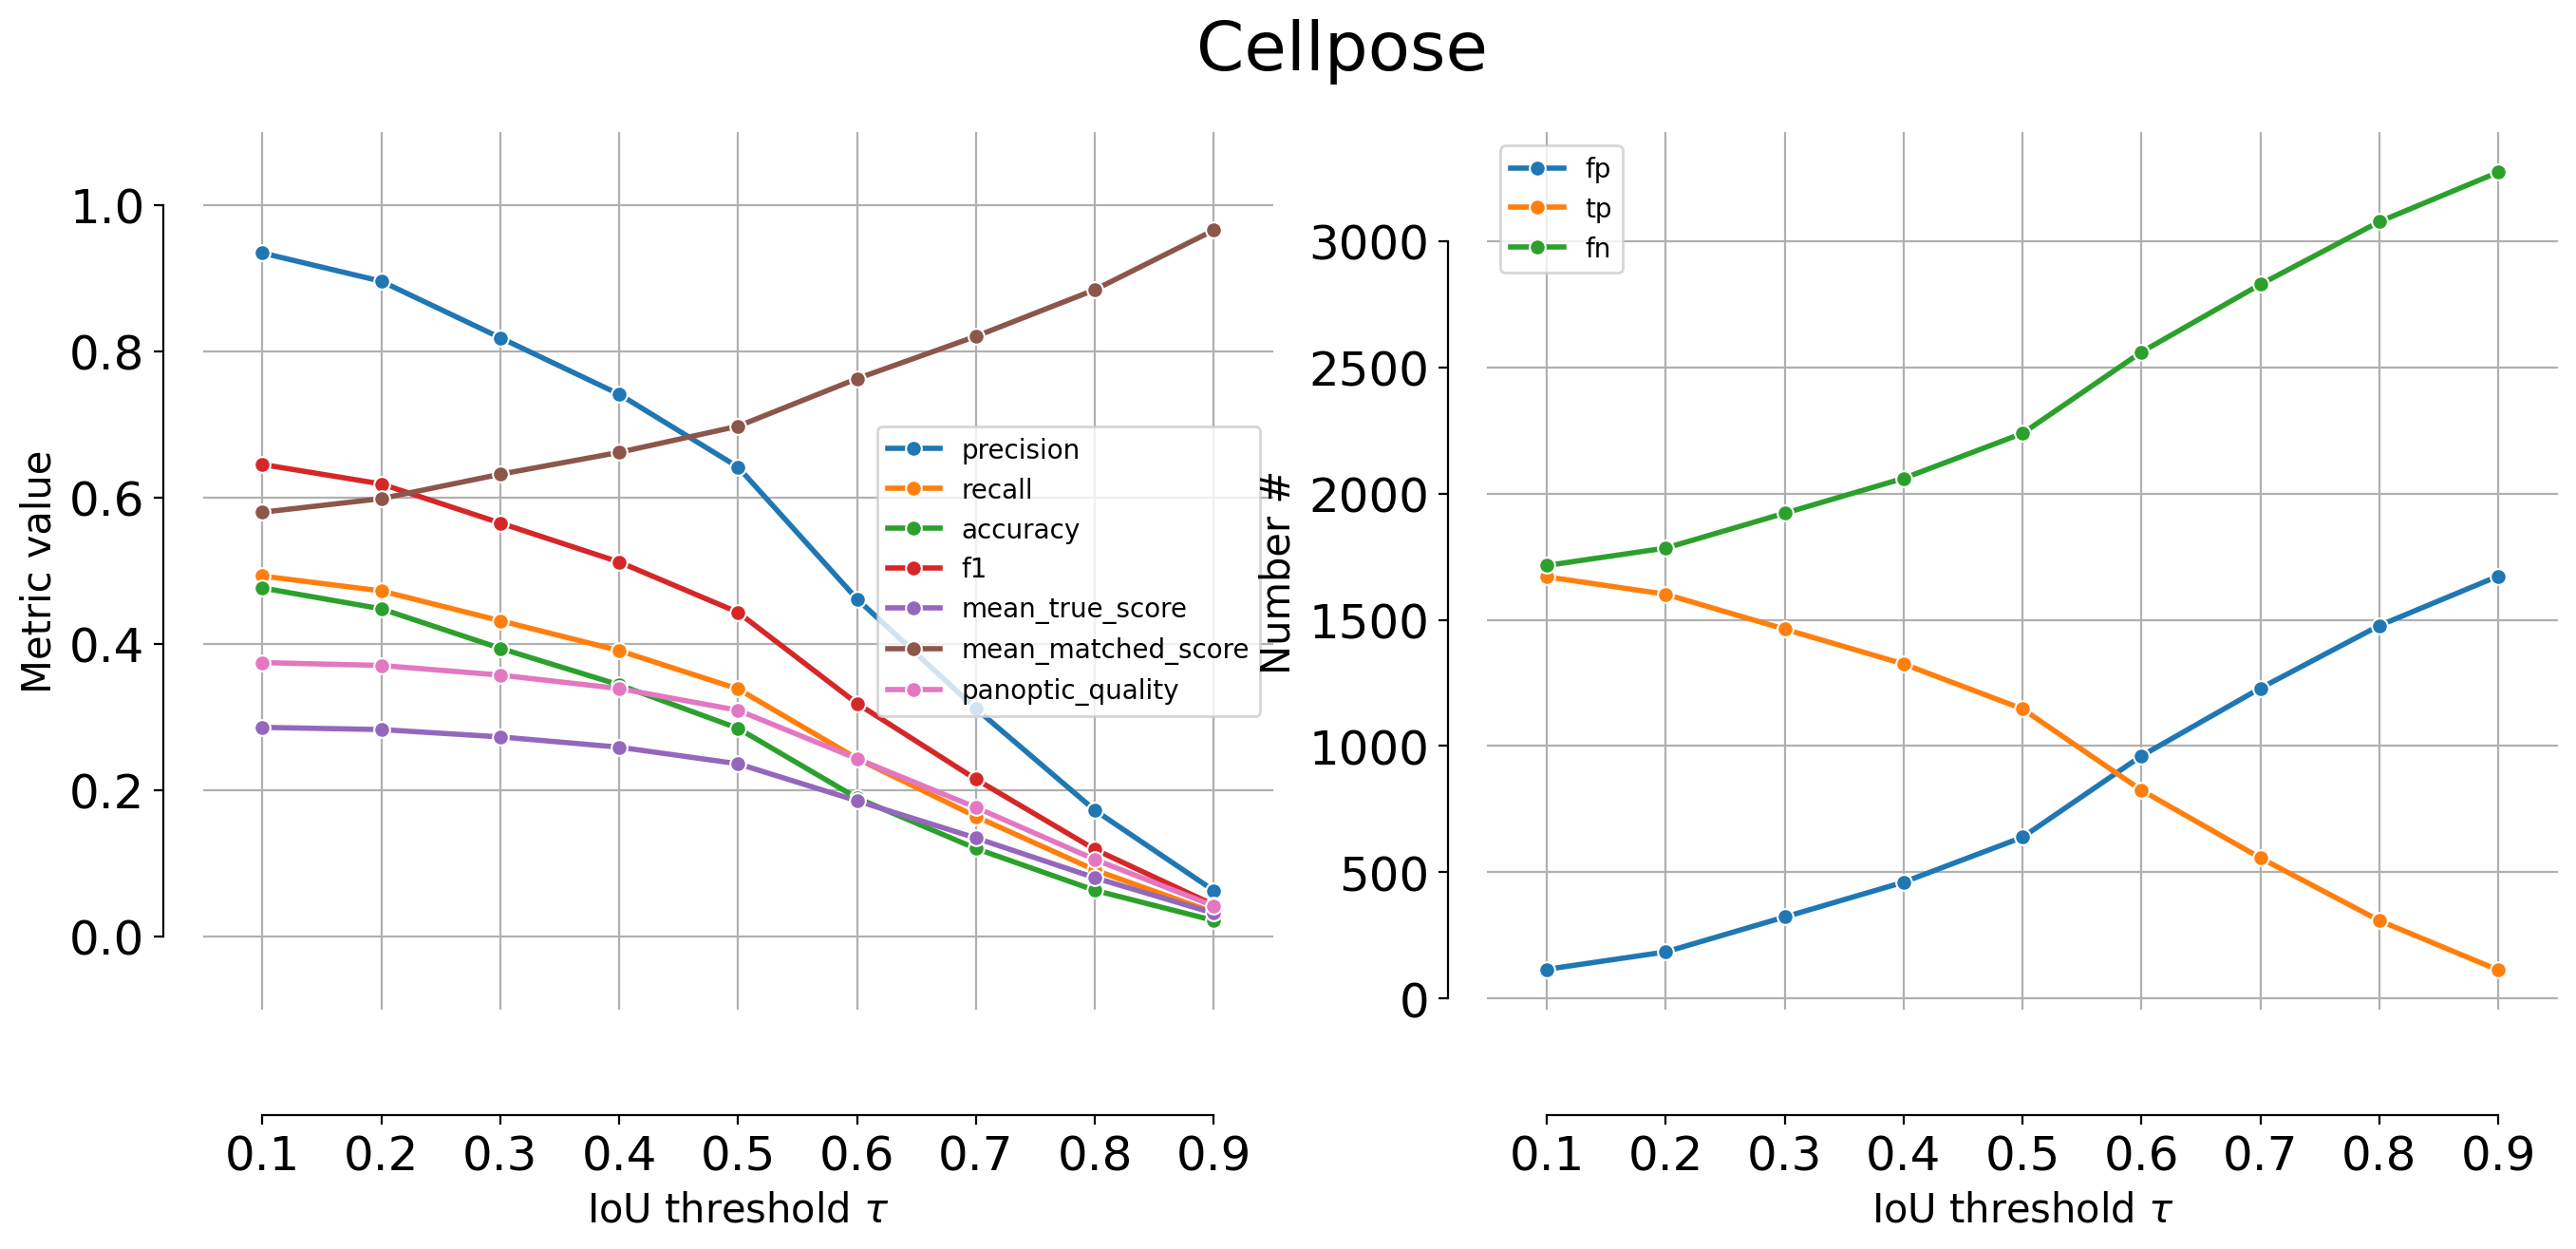

In [41]:

taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

predictions = [swin_instance, segresnet_instance, cellpose]
names = ["Swin", "SegResNet", "Cellpose"]

model_stats = []
dfs = []
for i, p in enumerate(predictions):
    print(f"Validating on {names[i]}")
    stats = [matching_dataset(
        labels_gt, p, thresh=t, show_progress=False
        ) for t in taus]
    model_stats.append(stats)
    plot_performance(taus, stats, name=names[i], use_palette=False)
    print("*"*20)

Plot parameters : 
- Colormap : mako
- DPI : 200
- Data path : C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK
- Font size : 15
- Title font size : 26
- Label font size : 18


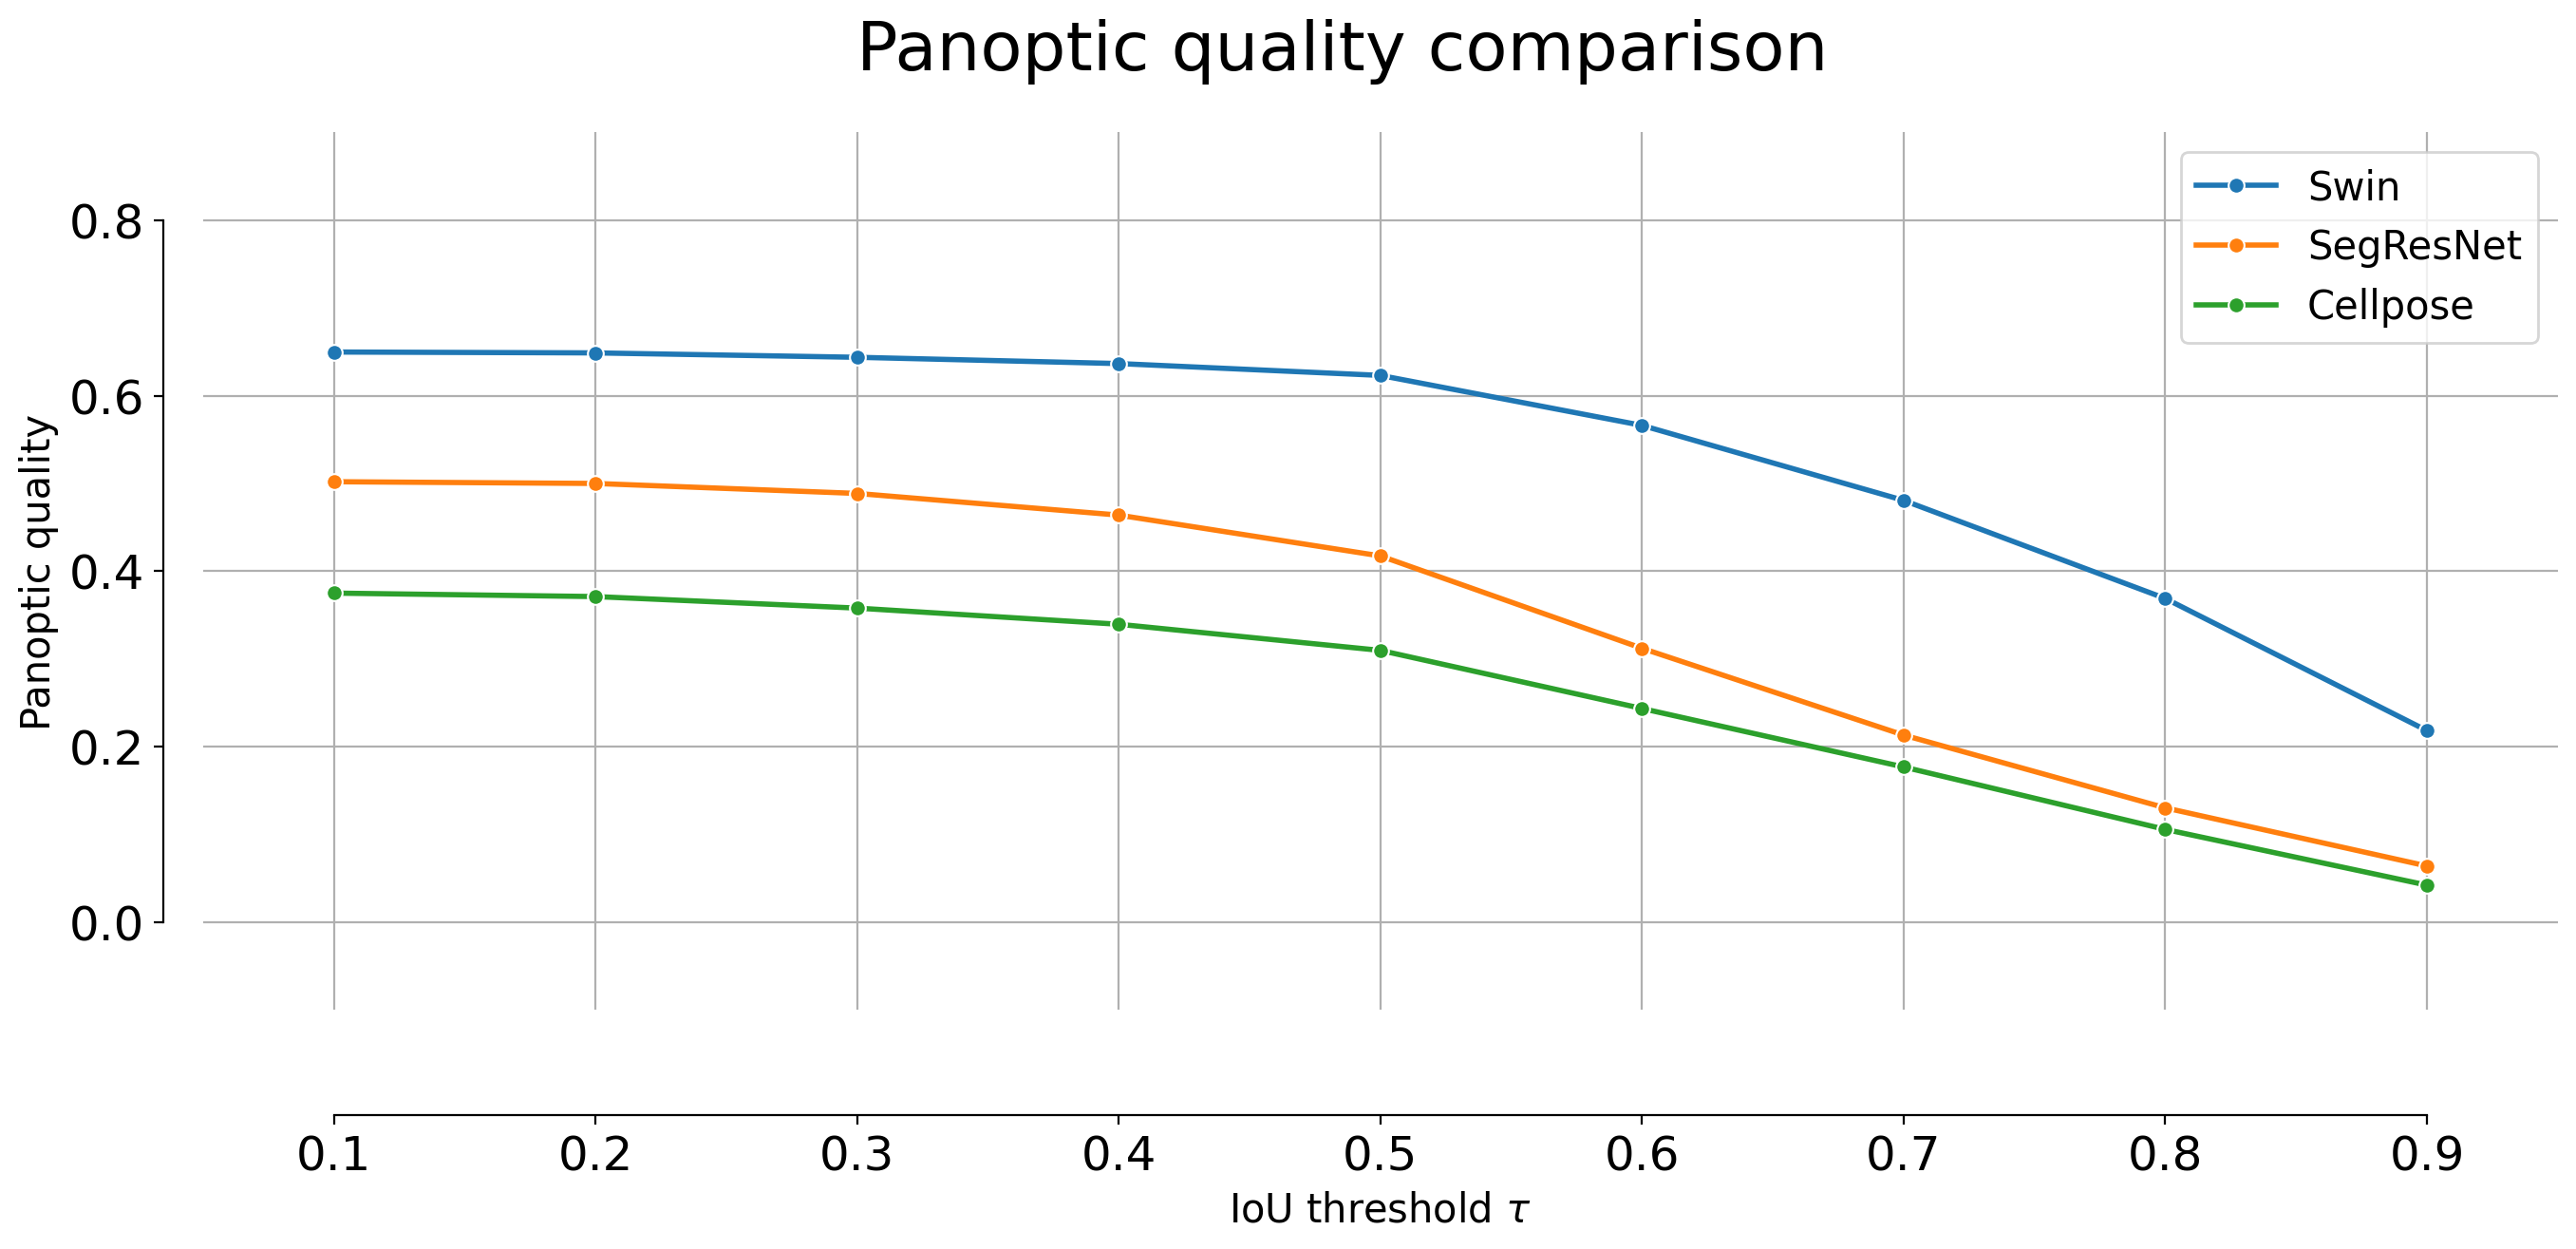

In [46]:
plot_stat_comparison(taus, model_stats, names, stat="panoptic_quality", use_palette=False)